***part1:***


  1.1 first open the csv file

  1.2 convert it into a data frame

  1.3 draw histogram


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import scipy.stats as sp

Saving Tarbiat.csv to Tarbiat (3).csv


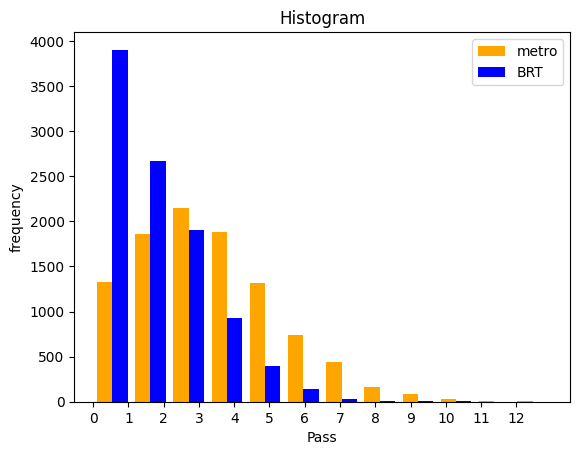

In [26]:
FILE_ADD = "Tarbiat.csv"
uploaded = files.upload()

df = pd.read_csv(FILE_ADD)
METRO = df.columns[0]
BRT = df.columns[1]

fig, ax = plt.subplots(1, 1)

plt.hist(df, color=["orange", "blue"], bins=12)

plt.legend([METRO, BRT])
plt.xticks(range(0, 13))
ax.set_xlabel("Pass")
ax.set_ylabel("frequency")
ax.set_title("Histogram")

# Show histogram
plt.show()

***part2:***

METRO:

We estimate passes of "metro" is a poisson distribution with lambda=3 according to the chart and the type of data given that is for a certain period of time we have the number of "metro" passes and it peaks in 3(the average is about 3 too) and it hovers around it in a poisson type graph


The code below is the coparision between the poisson dist. with lamda=3 and the "metro" chart


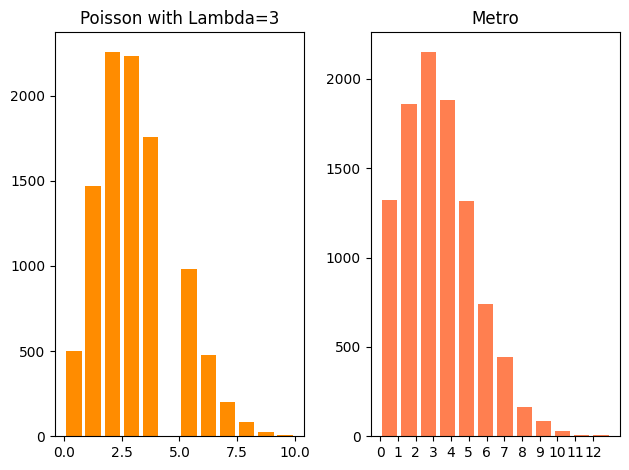

In [27]:
# part2
SIZE_DATA = 10000
dist = {}
lam = {}

# metro
fig, (ax1, ax2) = plt.subplots(1, 2)
lam[METRO] = 3
dist[METRO] = np.random.poisson(lam=lam[METRO], size=10000)
ax1.hist(dist[METRO], rwidth=0.8, color='darkorange', bins=12)
ax1.set_title(f"Poisson with Lambda={lam[METRO]}")
plt.xticks(range(0, 13))

ax2.hist(df[METRO], rwidth=0.8, color='coral', bins=12)
ax2.set_title("Metro")
plt.xticks(range(0, 13))

plt.tight_layout()
plt.show()

BRT:

We estimate passes of "brt" is a poisson distribution with lambda=1 according to the chart and the type of data given that is for a certain period of time we have the number of "metro" passes and it peaks in 1(the average is about 1 too) and it hovers around it in a poisson type graph


The code below is the coparision between the poisson dist. with lamda=1 and the "brt" chart

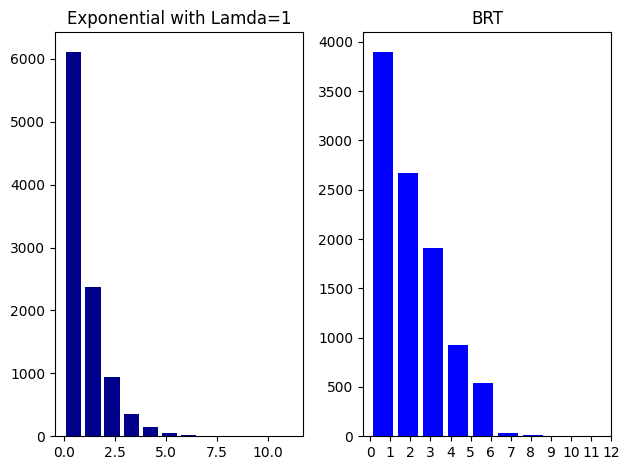

In [28]:
# BRT comparing real and estimated graph
fig, (ax1, ax2) = plt.subplots(1, 2)

# estimated
lam[BRT] = 1
dist[BRT] = np.random.exponential(scale=lam[BRT], size=SIZE_DATA)
ax1.hist(dist[BRT], color='darkblue', rwidth=0.8, bins=12)
ax1.set_title(f"Exponential with Lamda={lam[BRT]}")
plt.xticks(range(0, 13))

# real
ax2.hist(df[BRT], color='blue', rwidth=0.8, bins=8)
ax2.set_title("BRT")
plt.xticks(range(0, 13))
plt.tight_layout()
plt.show()


Now we calculated the exact parameter lambda using its expected (becuase E [ poisson($\lambda$) ] = $\lambda$ ) the average of metro passes is the lamda for poisson dist. of metro and the average of brt passes is lambda for the poisson dist. of brt.

In [29]:
calculated_lam = {}
calculated_lam[METRO] = df[METRO].mean()
calculated_lam[BRT] = df[BRT].mean()

The following code and graph is for "METRO"

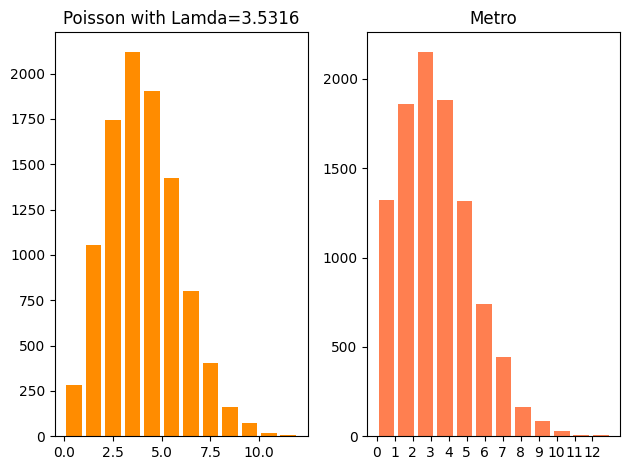

In [30]:
# METRO comparing real and calculated dist. graph
fig4, (ax3, ax4) = plt.subplots(1, 2)

# calculated lambda
dist[METRO] = np.random.poisson(lam=calculated_lam[METRO], size=10000)
ax3.hist(dist[METRO], rwidth=0.8, color='darkorange', bins=12)
ax3.set_title(f"Poisson with Lamda={calculated_lam[METRO]}")
plt.xticks(range(0, 13))

# real
ax4.hist(df[METRO], rwidth=0.8, color='coral', bins=12)
ax4.set_title("Metro")
plt.xticks(range(0, 13))

plt.tight_layout()
plt.show()

The following code and graph is for "BRT"

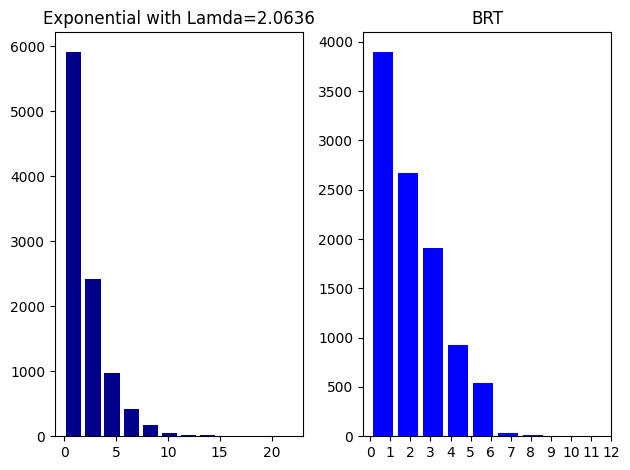

In [31]:
# BRT comparing real and calculated dist. graph
fig5, (ax3, ax4) = plt.subplots(1, 2)

# calculated lambda
dist[BRT] = np.random.exponential(scale=calculated_lam[BRT], size=SIZE_DATA)
ax3.hist(dist[BRT], color='darkblue', rwidth=0.8, bins=12)
ax3.set_title(f"Exponential with Lamda={calculated_lam[BRT]}")
plt.xticks(range(0, 13))

# real
ax4.hist(df[BRT], color='blue', rwidth=0.8, bins=8)
ax4.set_title("BRT")
plt.xticks(range(0, 13))
plt.tight_layout()
plt.show()

***part3:***

The code bellow will produce the density histgram of the "metro" passes.

The functions big picture doesn't change but instead of giving the frequancy of number of passes it will give the density of the probobility and becuase this is a descrete random variable it will produce probobilty for each pass


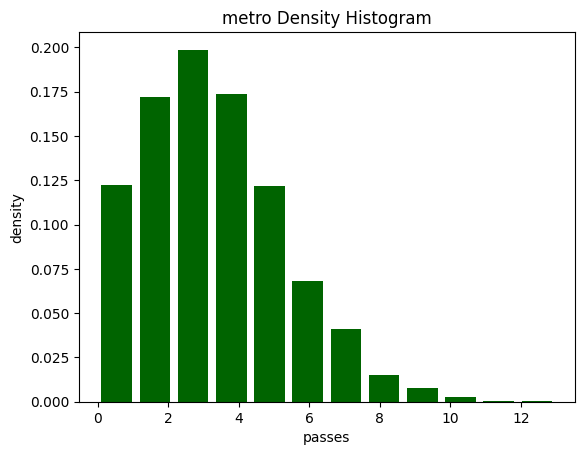

In [32]:
# part3
fig6, ax5 = plt.subplots(1,1)
plt.hist(df[METRO], bins=12, density=True, rwidth=0.8, color="darkgreen")
plt.title("metro Density Histogram")
plt.xlabel("passes")
plt.ylabel("density")
plt.show()

***part4:***

We compared the X random variable with the metro pass chart but for the purpose of this part we do it again, but with its density graphs.

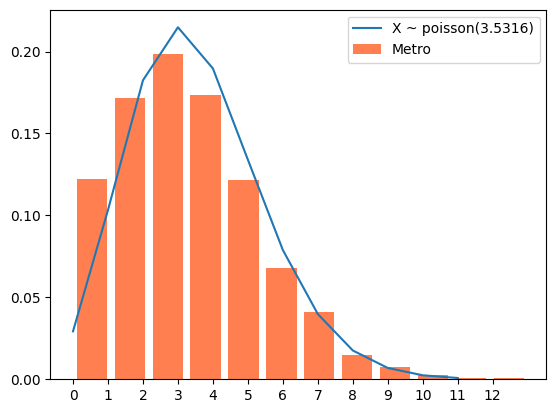

In [33]:
# part4
# X
X_dist = sp.poisson(mu=calculated_lam[METRO])
x_chart = np.arange(0, 12, 1)
y_chart = sp.poisson.pmf(x_chart, mu=calculated_lam[METRO])
plt.plot(x_chart, y_chart, label=f"X ~ poisson({calculated_lam[METRO]})")
# metro
plt.hist(df[METRO], rwidth=0.8, color='coral', bins=12, density=True, label="Metro")
plt.xticks(range(0, 13))

plt.legend()
plt.show()

***part5:***

X + Y = Z, Z is a random variable that is the sum of two poisson distributions with the parameters $\lambda$_x & $\lambda$_y so as we now sum of two poisson distributions is a poisson distribution with the parameter being the sum of both parameters -> Z ~ poisson($\lambda$_x + $\lambda$_y)

The code bellow will calculate the parameter of Z and then shows the plot of it.In the same figure we will show the histogram of the sum of frequancy of the metro and brt passes and this will allow us to see how close and how much of a good aproximation was the sum of the two poissons to represent the distribution of this data in tarbiat.csv file.

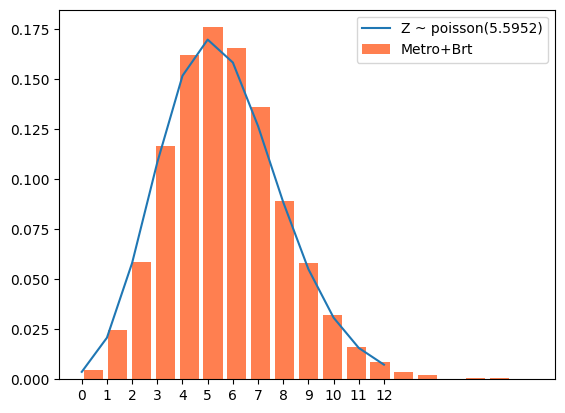

In [34]:
# part6
# Z distribution
lam_z = calculated_lam[METRO] + calculated_lam[BRT]
x_zchart = np.arange(0, 13, 1)
y_zchart = sp.poisson.pmf(x_zchart, mu=lam_z)
plt.plot(x_zchart, y_zchart, label=f"Z ~ poisson({lam_z})")
# metro + brt
sums = df.sum(axis=1)
sum_df = pd.DataFrame(sums, columns=['Sums'])
plt.hist(sum_df, rwidth=0.8, color='coral', bins=19, density=True, label="Metro+Brt")
plt.xticks(range(0, 13))

plt.legend()
plt.show()

***part6:***

It's a conditional distribution.

p( x | x + Y = n ) = p( X = k, X + Y = n ) / p( X + Y = n ) -> p( x | z = n ) = p( X = k, Y = n - k ) / p( Z = n ) -> p( X = k ) * p( Y = n - k ) / p( Z = n ) -> the rest is in the picture





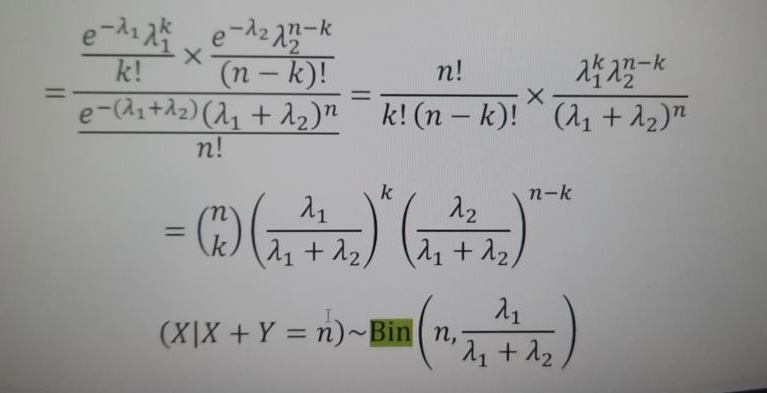

Conclusion: ( x | x + Y = n ) ~ Bin( n, $\lambda_x$ / $\lambda_x$ + $\lambda_y$ )



---

***part7:***

The code bellow will show the pmf(probobility mass function) of the W ~ Bin(n, $\lambda_x$ / $\lambda_z$)

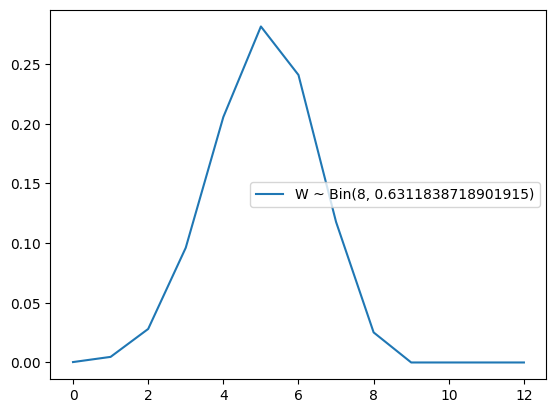

In [35]:
# part7
lam_x = calculated_lam[METRO]
lam_y = calculated_lam[BRT]
lam_z = lam_x + lam_y
N = 8
x_zchart = np.arange(0, 13, 1)
y_zchart = sp.binom.pmf(x_zchart, N, lam_x / lam_z)
plt.plot(x_zchart, y_zchart, label=f"W ~ Bin({N}, {lam_x / lam_z})")

plt.legend()
plt.show()

***part8***

First we filter the data frame so only values that their sum is 8 remain, because this is the evidence and that we now it has occured (condition) and then we showed the histogram of the remaining metros that are in the filtered data frame (the density of it)

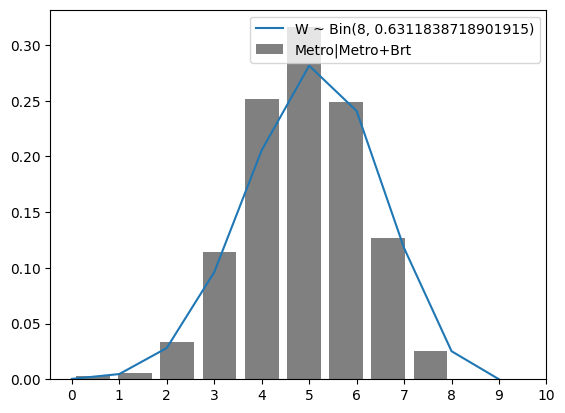

In [36]:
# part8
lam_x = calculated_lam[METRO]
lam_y = calculated_lam[BRT]
lam_z = lam_x + lam_y
N = 8
x_zchart = np.arange(0, 10, 1)
y_zchart = sp.binom.pmf(x_zchart, N, lam_x / lam_z)
plt.plot(x_zchart, y_zchart, label=f"W ~ Bin({N}, {lam_x / lam_z})")

conditioned_df = df[(df[METRO] + df[BRT]) == 8]
plt.hist(conditioned_df[METRO], rwidth=0.8, bins=9,color='gray', density=True, label="Metro|Metro+Brt")
plt.xticks(range(0, 11))

plt.legend()
plt.show()

End!